<a href="https://colab.research.google.com/github/raulFuzita/cct_ai/blob/2022_4_8/raul_fuzita_ML_CA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CCT College Dublin Continuous Assessment**

## **Assessment Information**

Programme Title:             BSc (Hons) in Computing and IT Y4

Cohort:                      Sept21

Module Title(s):             Machine Learning for AI

Assignment Type:             Individual

Assignment Title:            ML_CA1

Lecturer(s):                 David McQuaid

Issue Date:                  14/03/2022

Submission Deadline Date:    16/04/2022

## **Student Information**

Name:                        Raul Macedo Fuzita

ID:                          2018337



## Jupyter Notebook Information <font color='red'>(Important)</font>

<p align="justify">
&emsp;&emsp;This assignment was performed on Google Colab in Jupyter Notebook. This notebook contains advanced features such as HTML tags, Jupyter Notebook form components compatible with the version below (description) or above (newer version), and Widgets components.

&emsp;&emsp;If you are running on your local machine, please check if your Jupyter Notebook has the same version or above. This notebook was not tested in an old version, so I cannot guarantee support for the legacy notebooks.

&emsp;&emsp;If you are not sure what Jupyter Notebook version you have, you will find a command to check the version. You can access this material on my Github account, available at:  <a href="https://github.com/raulFuzita/cct_ai/tree/2022_4_8">https://github.com/raulFuzita/cct_ai/tree/2022_4_8</a>
</p>

```
jupyter core     : 4.5.0
jupyter-notebook : 5.2.2
qtconsole        : 4.5.2
ipython          : 5.5.0
ipykernel        : 4.10.1
jupyter client   : 5.3.1
jupyter lab      : not installed
nbconvert        : 5.5.0
ipywidgets       : 7.5.0
nbformat         : 4.4.0
traitlets        : 4.3.2
```

&emsp;&emsp;Make your own changes or have a copy in you Google Drive. Go to `File > Save a copy in Drive`

In [72]:
#@markdown 👈 &nbsp; **Please, run this code cell to check your Jupyter Notebook version.** <font color="lightgreen">(Recommended)</font>
!jupyter --version

Selected Jupyter core packages...
IPython          : 5.5.0
ipykernel        : 4.10.1
ipywidgets       : 7.7.0
jupyter_client   : 5.3.5
jupyter_core     : 4.9.2
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : 0.5.13
nbconvert        : 5.6.1
nbformat         : 5.2.0
notebook         : 5.3.1
qtconsole        : 5.2.2
traitlets        : 5.1.1


# Machine Learning for AI

<img width='700vh' src="https://github.com/raulFuzita/cct_ai/blob/2022_4_8/data_dictionary_ca1.png?raw=true">

## Importing All the Necessary Packages for This project <font color="red">(Important)</font>

In [73]:
#@markdown 👈 &nbsp; Please, run this cell to load all the necessary packages. You must run this cell otherwise the rest of the code will not work.

import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   
import seaborn as sns             
import random
import statistics as stats
from scipy import stats as st
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import os
from sklearn.tree import export_graphviz
import ipywidgets as widgets
from IPython.display import display, HTML

## Importing the data set <font color='red'>(Important)</font>

In [74]:
#@markdown 👈 &nbsp; Please, run this cell to import the data set to show the 5 first rows and 5 last.

#@markdown &emsp;&emsp;This data set does not contain column names. The first line is the first observation. 
#@markdown One way to add names to the columns is to import the data set and then assign the property <code>columns</code> with an array of strings.
#@markdown Unfortunately, that approach will replace the first observation with the names of the columns.
#@markdown To address this problem we will assign the names into the <code>read_csv</code> method, so we will not replace the first observation.

columnsnames = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']

df = pd.read_csv('https://raw.githubusercontent.com/raulFuzita/cct_ai/2022_4_8/glass_data.csv', names=columnsnames)

df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Exploratory Data Analysis (EDA)

In [75]:
#@markdown 👈 &nbsp; Please, run this cell to drop the column called Id. We will not need this column for the analysis and prediction.
df.drop('Id', axis=1, inplace=True)

### Data set overview

In [76]:
#@markdown 👈 &nbsp; Please, run this cell to show some information about this data set such as null values and their types.

#@markdown &emsp;&emsp;As we can see there are no null values and all columns are numeric types which is good to know. We do not have to change the type of some values or handle missing data.

#@markdown &emsp;&emsp;One thing not mentioned previously is that the data set has 214 observations and 11 features. we can conclude we are dealing with a small data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [77]:
#@markdown 👈 &nbsp; Please, run this cell to show a description of our data set. For instance, we should be able to see whether an element is found above the 1st quartile or above.
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000



<ul>
  <li>
  <p align="justify">
Most of the glasses do not contain Iron (Fe). It is found above the 3rd quartile of all observations. According to Glass Packing Institute, iron is a colouring agent (GPI, 2022).
  </p>
  </li>
  <li>
  <p align="justify">
Aluminium (Al) is found in all observations. Aluminium is considered the backbone of the glassy phase. The difference between each quartile increases. From min to max: 0.9, 0.17, 0.27, 1.87 (GPI, 2022).
  </li>
  <li>
  <p align="justify">
Calcium (Ca) and Magnesium (Mg) combined helps to give durability to the glassy phase. They are Abundant materials (GPI, 2022).
  </p>
  </li>
  <li>
  <p align="justify">
Analysing the refractive index (RI) we can see that overall all the glasses have similar levels of refraction. According to a paper published by Weber State University, "the refractive index is a unitless number, between 1.3000 and 1.7000 for most compounds" (Weber State University, 2022). The closer RI is to 1, the less refraction a glass has (Blender Basecamp, 2022).
  </p>
  </li>
  <li>
  <p align="justify">
Barium (Ba) is not found in most of our observations. Barium is an efficient substitute for lead, and it is environmentally safe. At this stage, we are just taking an overview of the data. If our assumptions are right we should find some Barium for headlamps observations (Springer Link, 2020). If we check the *Type of glass* it gives us a hint that we are right.
  </p>
  </li>
  <li>
    <p align="justify">
Unfortunately, in this analysis, we cannot see the relation of glass types 5 and 6 to the elements. Type 4 is not found in this data set as mentioned in the Data <i>Dictionary of Data Set column description</i>. We will need to analyse deeper to explore this data set.
  </p>
  </li>
</ul>

In [78]:
#@markdown 👈 &nbsp; Please, run this cell to show the unique values of glass types.
pd.unique(df['Type_of_glass'])

array([1, 2, 3, 5, 6, 7])

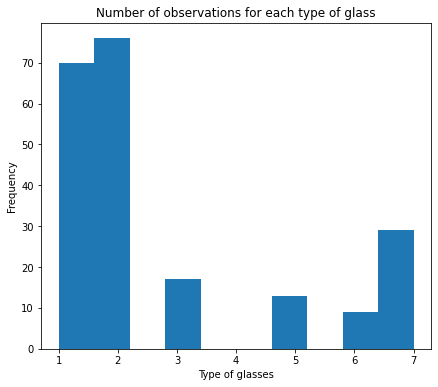

In [79]:
#@markdown 👈 &nbsp; Please, run this cell to check what is the proportion of observation for each type of glass.

#@markdown &emsp;&emsp;As we can see below, type 3, 5, 6, and 7 there is not as much observation as types 1 and 2.
#@markdown It can be a problem to train our model and classify a sample.

fig = plt.figure(figsize = (7,6))
ax = fig.gca()

plt.hist(df['Type_of_glass'])
plt.xlabel('Type of glasses')
plt.ylabel('Frequency')
plt.title('Number of observations for each type of glass')
plt.show()

### Applying Min-Max Scalar Normalization

In [80]:
#@markdown 👈 &nbsp; Please, run this cell to create a copy of the original data set, and then normaize it.

#@markdown &emsp;&emsp;Original data set name: <code>df</code>

#@markdown &emsp;&emsp;Min-Max Normalized data set name: <code>dfmmn</code>

dfmmn = df.iloc[:,range(0,9)].copy()

x = dfmmn.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfmmn = pd.DataFrame(x_scaled)
dfmmn.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
dfmmn = pd.concat([dfmmn.reset_index(drop=True), df['Type_of_glass']], axis=1)

In [81]:
#@markdown 👈 &nbsp; Please, run this to create two dictionary with data grouped by glass type.
#@markdown The first dictionary is called <code>gtgrouped</code> (Glass type grouped).
#@markdown The second dictionary is called <code>gtMMN</code> (Glass type Min-Max Normalization)
#@markdown which contains the normalized data.

gtgrouped = dict(tuple(df.groupby('Type_of_glass')))
gtMMN = dict(tuple(dfmmn.groupby('Type_of_glass')))

In [82]:
#@markdown 👈 &nbsp; Please, run this cell to load an algorithm to plot miltiple boxplots.

#@markdown Parameters of multiBoxplot method<br><code>multiBoxplot(df, colnames, width=1, xlabel='', ylabel='', title='', main='')</code>

#@markdown Markdown Tag<br><code>title="Print column name: {}"<br>multiBoxplot(df, ['Age'], title=title)</code><br>
#@markdown <code>>>> Print column name: Age</code>

# Author: Raul Macedo Fuzita
# Github: https://github.com/raulFuzita
# Date: 18-03-2022
# Version: 1.0.2
import math

def multiBoxplot(df, colnames, width=1, xlabel='', ylabel='', title='', main=''):
  height = math.ceil(len(df.keys())/width)
  fig, axes = plt.subplots(height, width, figsize=(18, 10))
  fig.suptitle(main, fontsize=20)
  x = 0
  y = 0
  if not title:
    title = '{}'
  for k in df.keys():
        tmpTitle = title.format(str(k))
        tmpAxes = None
        if height <= 1:
          tmpAxes = axes[x]
        else:
          tmpAxes = axes[y, x]
        sns.boxplot(ax=tmpAxes, data=df[k][colnames]).set(
            xlabel=xlabel, ylabel=ylabel, title=tmpTitle)
        x+=1
        if x >= width:
          x = 0
          y +=1
  plt.show()

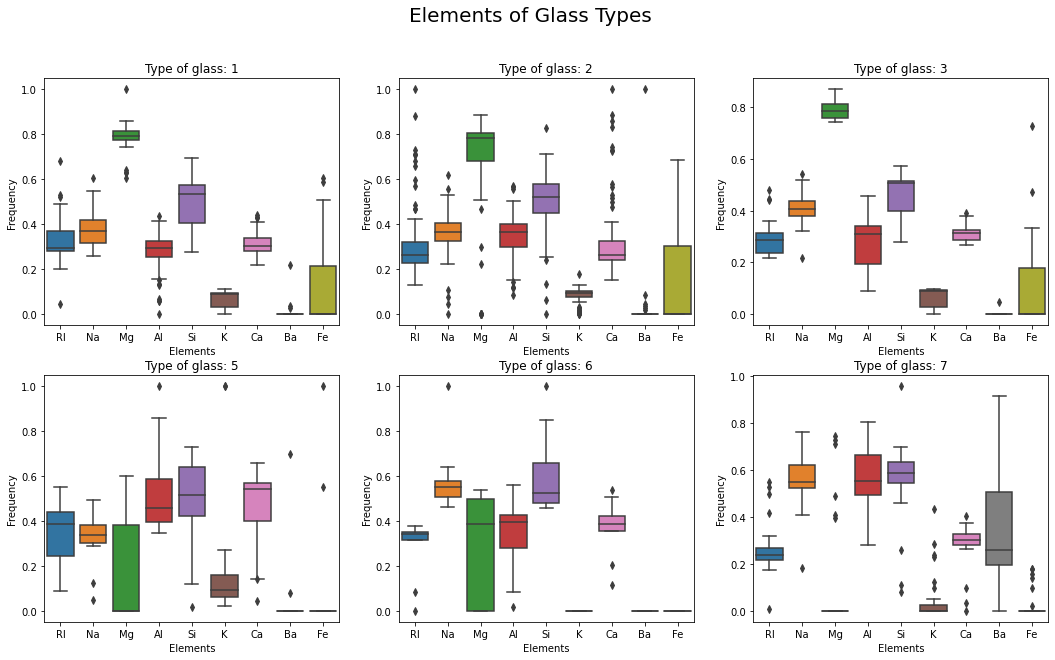

In [83]:
#@markdown 👈 &nbsp; Please, run this cell to show a boxplot of each glass type. For this plots the best option is the grouped and normalized data set to avoid scale problem.
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
multiBoxplot(gtMMN, cols, 3, 'Elements', 'Frequency', 'Type of glass: {}', 'Elements of Glass Types')

### Analysing Outliers

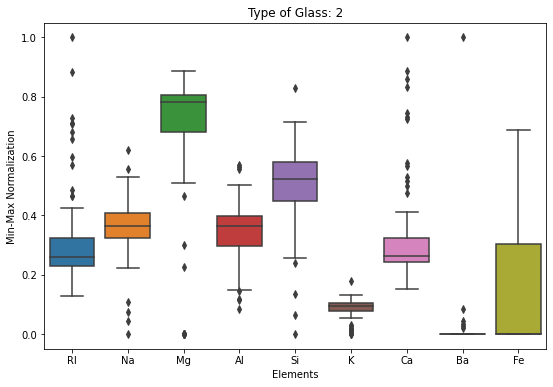

In [84]:

#@markdown 👈 &nbsp; Please, run this cell to show one more time the glass type 2.
plt.subplots(figsize=(9, 6))
sns.boxplot(data=gtMMN[2].iloc[:,range(0,9)]).set(xlabel='Elements', ylabel='Min-Max Normalization', title='Type of Glass: 2')
plt.show()

<p align="justify">
&emsp;&emsp;Notice that glass type 2 has some features where many points are seen above or below the whiskers of the boxplot. Those outliers can affect our model in the future; however, we want to be careful to not undersample this class.
</P>

<p align="justify">
&emsp;&emsp;Next, we have to run a few methods that will help us to simulate what the Ca feature would look like if we apply some techniques to deal with outliers.
</p>

#### Loading Algorithm to Perform Simulation

In [85]:
#@markdown 👈 &nbsp; Please, run this cell to load an algorithm to plot miltiple histplots.

#@markdown Parameters of multiHistplot method<br><code>multiHistplot(df, colnames, width=1, xlabel='', ylabel='', title='', main='', kde=False)</code>

#@markdown Markdown Tag<br><code>title="Print column name: {}"<br>multiBoxplot(df, ['Age'], title=title)</code><br>
#@markdown <code>>>> Print column name: Age</code>

# Author: Raul Macedo Fuzita
# Github: https://github.com/raulFuzita
# Date: 20-03-2022
# Version: 1.0.2
import math

def multiHistplot(df, colnames, width=1, xlabel='', ylabel='', title='', main='', kde=False):
  height = math.ceil(len(df.keys())/width)
  fig, axes = plt.subplots(height, width, figsize=(18, 10))
  fig.suptitle(main, fontsize=20)
  x = 0
  y = 0
  if not title:
    title = '{}'
  for k in df.keys():
        tmpTitle = title.format(str(k))
        tmpAxes = None
        if height <= 1:
          tmpAxes = axes[x]
        else:
          tmpAxes = axes[y, x]
        sns.histplot(ax=tmpAxes, data=df[k][colnames], kde=kde).set(
            xlabel=xlabel, ylabel=ylabel, title=tmpTitle)
        x+=1
        if x >= width:
          x = 0
          y +=1
  plt.show()

In [86]:
#@markdown 👈 &nbsp; Please, run this cell to load <code>Remove_Outlier_Indices(df)</code> method.

#@markdown &emsp;&emsp;Remove Outlier Indices method uses Interquartile Range (IQR) to remove outliers.

def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

In [87]:
#@markdown 👈 &nbsp; Please, run this cell to load an algorithm to simulate how a feature would look like
#@markdown if we replace the outliers by the mean, median, mode and remove them.

#@markdown Parameters of Simulate Outliers Solution method<br>
#@markdown <code>simulate_outliers_solution(df, colnames, xlabel='', ylabel='', main='', **title)</code>

#@markdown Change titles (Optional)

#@markdown <code>title={'Age': 'Average Retirement'}</code><br><code>simulate_outliers_solution(df, ['Age'], **title)</code>

#@markdown Markdown Tag (Optional)

#@markdown <code>title={'Age': 'Average {} Retirement'}</code><br><code>simulate_outliers_solution(df, ['Age'], **title)</code>

#@markdown <code>>>> 'Average Age Retirement'</code>

# Author: Raul Macedo Fuzita
# Github: https://github.com/raulFuzita
# Date: 20-03-2022
# Version: 1.0.1

def simulate_outliers_solution(df, colnames, xlabel='', ylabel='', main='', **title):
  for col in df[colnames]:

    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)

    mean = df[[col]].mean()
    median = df[[col]].median()
    mode = stats.mode(df[col])

    dfmean = df[[col]].copy()
    dfmedian = df[[col]].copy()
    dfmode = df[[col]].copy()
    dfsubset = df[[col]].copy()

    dfmean[(dfmean[col] < Q1) | (dfmean[col] > Q3)] = mean
    dfmedian[(dfmedian[col] < Q1) | (dfmedian[col] > Q3)] = median
    dfmode[(dfmode[col] < Q1) | (dfmode[col] > Q3)] = mode

    nonOutlierList = Remove_Outlier_Indices(df[[col]])
    dfsubset = df[nonOutlierList]

    comp = {
        'Mean': dfmean,
        'Median': dfmedian,
        'Mode': dfmode,
        'Outliers_removed': dfsubset
    }

    t=''
    if len(title) > 0:
      t = title[col]

    multiBoxplot(comp, [col], 2, xlabel, ylabel, title=t, main=main+'\n(Boxplot)')
    multiHistplot(comp, [col], 2, xlabel, ylabel, title=t, main=main+'\n(Histogram)', kde=True)

  plt.show()

#### Simulating Outliers Replacement

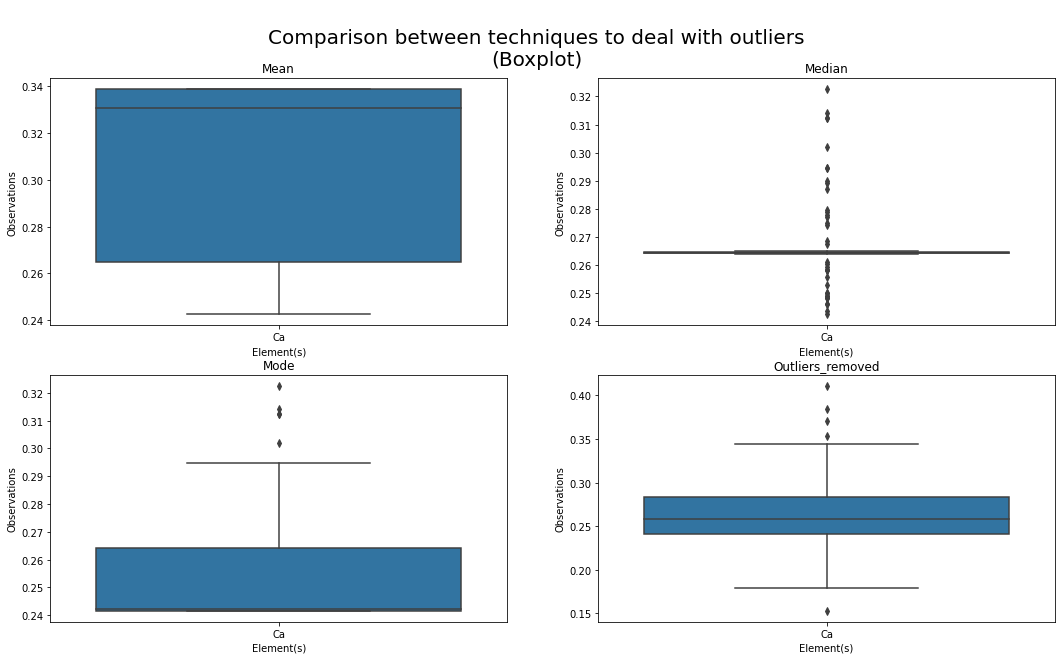

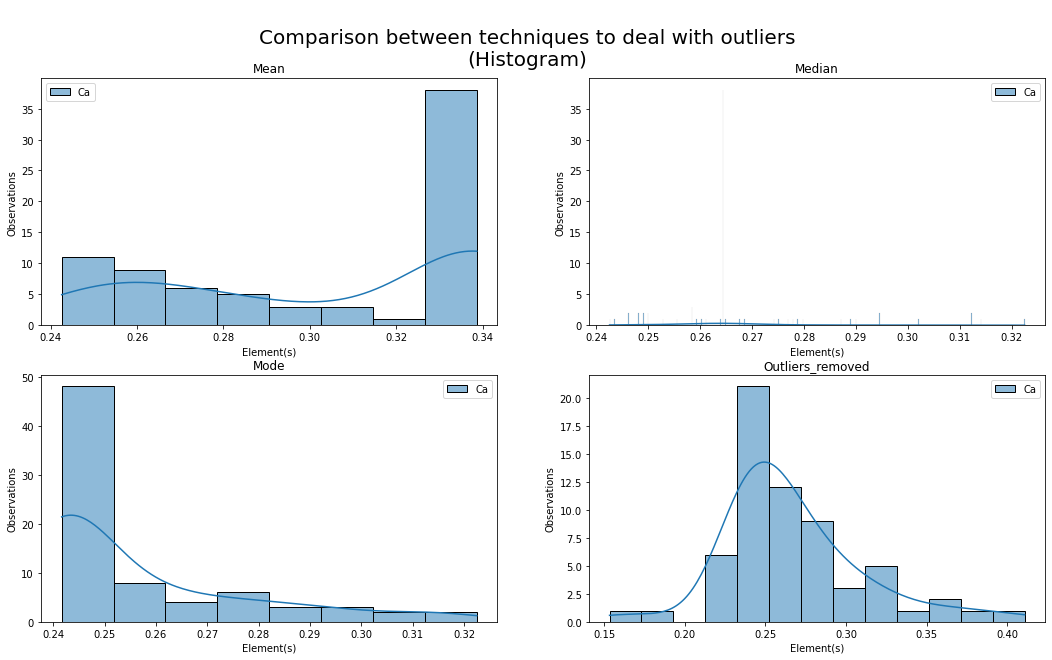

In [88]:
#@markdown 👈 &nbsp; Please, run this cell to show a simulation of how a or many feature(s) would look like 
#@markdown if we replace the outliers by the mean, median, mode or remove them.

#@markdown &emsp;&emsp;In this scenario, we are testing it with the Ca feature.

#@markdown &emsp;&emsp;This plot is quite long, notice that on the right of your screen, you have two scroll bars.  
#@markdown One is the page scroll bar and the inner one is the plot scroll bar.

main = '\nComparison between techniques to deal with outliers'
xlabel = 'Element(s)'
ylabel = 'Observations'
simulate_outliers_solution(gtMMN[2], ['Ca'], xlabel, ylabel, main)

<p align="justify">
&emsp;&emsp;The example above give us a clear picture of how each technique would affect the Ca feature. When applied the mean to the sample all the outliers are gone. However, it is expected to have a sample skewed to the left since we have quite many outliers. Replacing the outliers by the median created even more outliers and the distribution in the histogram look much worse than when we applied the mean. Our third option is to replace all the outliers by the mode which is by the number that appears the most in this sample. This technique left behind some outliers yet, and become very skewed to the right. Opposite of what happened when we replace them by the mean. Last, but not least. We removed all the outliers based on the IQR which left behind yet a few outliers. However, this technique provided a better distribution.
</p>

### Removing Outliers

In [89]:
#@markdown 👈 &nbsp; Please, run this cell to remove the outliers from glass types 1 and 2. 
#@markdown We have a small sample of data if we remove outliers from the other types we will end up undersampling our data set.
#@markdown As we saw at the begging of our analysis the two first glass types have most of the observations.

gtMMN12 = {}

for i in [1, 2]:
  nonOutlierList = Remove_Outlier_Indices(gtMMN[i])
  gtMMN[i] = gtMMN[i][nonOutlierList]
  gtMMN[i].dropna(inplace=True)
  gtMMN12[i] = gtMMN[i]

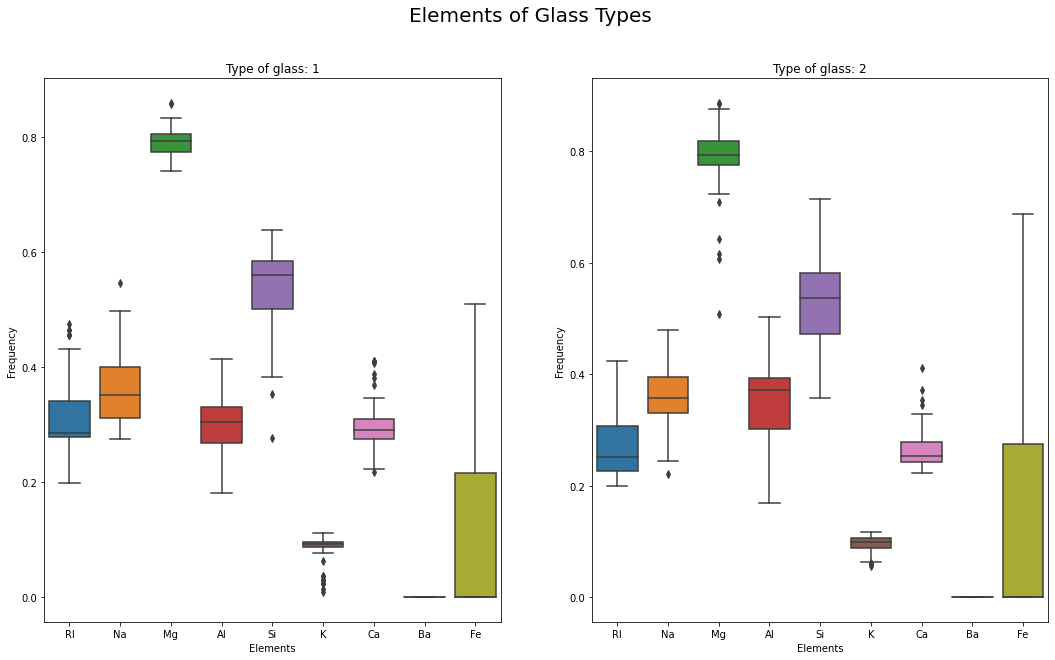

In [90]:
#@markdown 👈 &nbsp; Please, run this cell to show glass types 1 and 2 after we remove the outliers.

cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
multiBoxplot(gtMMN12, cols, 2, 'Elements', 'Frequency', 'Type of glass: {}', 'Elements of Glass Types')

In [91]:
#@markdown 👈 &nbsp; Please, run this cell to calculate the mean, Q1, Q2, and Q3 for each type of glass. For this plots the best option is the grouped and normalized data set to avoid scale problem.

gtdesc = {}

for k in gtMMN:
  tmp = gtMMN[k].describe().drop(['count', 'std', 'min', 'max'])
  tmp.drop('Type_of_glass', axis=1, inplace=True)
  gtdesc[k] = tmp

In [92]:
#@markdown 👈 &nbsp; Please, run this cell and then select a type of glass. You can select different options as many time as you want as long as you have run it at least once. 


options = {'1 - Building windows f.p': 1,	
           '2 - Building windows non f.p': 2,	
           '3 - Vehicle windows f.p': 3,	
           '5 - Containers': 5,	
           '6 - Tableware': 6,	
           '7 - Headlamps': 7}

glass_types_picker = widgets.Select(
    options=list(options.keys()),
    value='1 - Building windows f.p',
    description='Types: '
)

@widgets.interact(symbols=glass_types_picker)
def render(symbols):
  print(symbols)
  plt.figure(figsize=(9,8))
  for l in gtdesc[options[symbols]].index:
    xl = gtdesc[options[symbols]].loc[l].index
    yl = gtdesc[options[symbols]].loc[l]
    plt.plot(xl, yl)

  plt.title(symbols, fontsize=18)
  plt.legend(list(gtdesc[options[symbols]].index))
  plt.xlabel('Elements', fontsize=14)
  plt.ylabel('Min-Max Normalize', fontsize=14)
  plt.show()

interactive(children=(Select(description='Types: ', options=('1 - Building windows f.p', '2 - Building windows…

<p align="justify">
&emsp;&emsp;Notice that types 1, 2, and 3 (e.g., building windows float processed, building windows non float processed, vehicle windows float processed) have a plot with a similar shape. This can be challenging for the classification algorithm to distinguish between those three types during our prediction phase. 
</p>

## Classification Algorithms

### K Nearest Neighbors (KNN)

<p align="justify">
&emsp;&emsp;K-Nearest Neighbors also called KNN is a simple algorithm that does not require fit the model as in regression. However, the prediction or classification results depend on how similarity is measured and whether the attributes are scaled. To classify a record KNN tries to find out whether the majority class is among similar records, and then assigns that class to a new record (Peter Bruce, Andrew B., Peter G., 2020).
</p>

In [93]:
#@markdown 👈 &nbsp; Please, run this cell to convert our dictionary into a single data set <font color='red'>(Important)</font>
# Concat multiple data frames
dfmmn = pd.concat([gtMMN[1].reset_index(drop=True), gtMMN[2], gtMMN[3], gtMMN[5], gtMMN[6], gtMMN[7]])

In [94]:
#@markdown 👈 &nbsp; Please, run this cell to load a simple method to print the KNN results. 

#@markdown Parameter Methods:

#@markdown &emsp;&emsp;The test parameter is the test data with all features. It is not the X_test that contains only the predictor features.

#@markdown <code>result = {'test': test, 'label': target, 'y_pred': y_pred, 'proba': proba, 'score': score}</code>

#@markdown <code>printModelResults(result:dict)</code>

def printModelResults(result, showtestdata=True):

  target=result['label']
  test=result['test']
  y_test=result['y_test']
  y_pred=result['y_pred']
  proba=result['proba']
  score=result['score']
  if showtestdata:
    print('\nSelected for test:\n', test)
  print('\nClassification:  ', end='')
  print('Probability:'+' '*33, end='')
  print('Actual Type:')
  for i in range(0, len(y_pred)):
    col1=str(y_pred[i])
    col2=str(proba[i])
    print(' '+col1+' '*(18-len(col1)), end='')
    print(col2+' '*(45-len(col2)), end='')
    print('{}'.format(y_test.reset_index()[target][i]))
  print('\nNumber of Correct and Wrong Classification: ')
  print((y_pred == y_test).value_counts())
  print('\nAccuracy:', score)


In [95]:
#@markdown 👈 &nbsp; Please, run this cell to load variables with the predictors and target <font color='red'>(Important)</font>

#@markdown <code>predictors = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']</code>

#@markdown <code>target = 'Type_of_glass'</code>

predictors = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = 'Type_of_glass'

In [96]:
#@markdown 👈 &nbsp; Please, run this cell to run the model for the first time. In this example, we are using a data set without being normalized. 
#@markdown For the test sample we have 10% of the first observation of the data set, and 90% for training.
#@markdown The K value is set to 10.

perc_10 = (len(df)*10)/100

test = df.loc[0:perc_10, :]
X_test = test.iloc[:,:-1]
y_test = df.loc[0:perc_10, target]

X_train = df.loc[perc_10+1:, predictors]
y_train = df.loc[perc_10+1:, target]

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

r = {
    'test': test,
    'y_test': y_test,
    'label': target,
    'y_pred': knn.predict(X_test),
    'proba': knn.predict_proba(X_test),
    'score': knn.score(X_test, y_test)
}

print('Train size: {}'.format(len(X_train)))
print('Test size:  {}'.format(len(X_test)))

printModelResults(r)

Train size: 191
Test size:  22

Selected for test:
          RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type_of_glass
0   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00              1
1   1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00              1
2   1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00              1
3   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00              1
4   1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00              1
5   1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26              1
6   1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00              1
7   1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00              1
8   1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00              1
9   1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11              1
10  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24              1
11  1.51763  12.80  3.66  1.27  73.0

<p align="justify">
&emsp;&emsp;Above we have the result after fitting our model and classifying our test data. No other technique was done to improve our model. The idea is we explore how to improve the model and see if we can increase the accuracy.
</p>

<p align="justify">
&emsp;&emsp;Let's break down our analysis, the first section we have all the testing data and their information. In the next section, we have three columns, the first one is what the model classified. The second column is the probability the model rated for each class. The third column is the actual glass type for each classification. At the very bottom of the result, we have the accuracy of the model.
</p>

<p align="justify">
&emsp;&emsp;As we can see, the first classification failed. The model believes the probability of the first data being a glass type 1 is 0.4 or 40%, type 2 is 0.5 or 50%, and type 3 is 0.3 or 30%. Of rouse, this is due to the similarity we saw before in our analysis. Type 1 and 2 has a similar graphic shape.
</p>

#### Convention

<p align="justify">
&emsp;&emsp;The first analysis of the model gave us a glimpse of the potential and simplicity of the KNN model. The results of the probability column and the accuracy are shown as a fraction between 0 and 1. For convention, from now on we will not refer to the percentage out of the range between 0 and 1 (e.g., 0.4 as 40%, 0.5 as 50%).
</p>



#### Key Terms for KNN

***K (n_neighbors)***

&emsp;&emsp;The number of neighbors considered in the nearest neighbor calculation.
<p align="justify">
&emsp;&emsp;Usually, K is set to 1 as a default value. However, if K is too low we may be overfitting, and if K is too high we may be oversmoothing. Typically, values of K fall in the range of 1 to 20. The smoothness will depend on the accuracy metric (Peter Bruce, Andrew B., Peter G., 2020).
</p>


#### Improving the Model 

In [97]:
#@markdown 👈 &nbsp; Please, run this cell to show the result of the first attempt to improve the model.

#@markdown &emsp;&emsp;Let's train the model again with a different data set. The chosen data set is the one we normalized and removed the outliers that were out of the IQR range.
#@markdown We will also change the K value from 10 to 5. We will use 10% of the data for testing the remaining 90% for training.

perc_10 = (len(dfmmn)*10)/100

test = dfmmn.loc[0:perc_10, :]
X_test = test.iloc[:,:-1]
y_test = dfmmn.loc[0:perc_10, target]

X_train = dfmmn.loc[perc_10+1:, predictors]
y_train = dfmmn.loc[perc_10+1:, target]

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

r = {
    'test': test,
    'y_test': y_test,
    'label': target,
    'y_pred': knn.predict(X_test),
    'proba': knn.predict_proba(X_test),
    'score': knn.score(X_test, y_test)
}

print('Train size: {}'.format(len(X_train)))
print('Test size:  {}'.format(len(X_test)))

printModelResults(r, showtestdata=False)

Train size: 152
Test size:  18

Classification:  Probability:                                 Actual Type:
 2                 [0.2 0.8 0.  0.  0.  0. ]                    1
 2                 [0. 1. 0. 0. 0. 0.]                          1
 2                 [0.4 0.6 0.  0.  0.  0. ]                    1
 1                 [0.8 0.2 0.  0.  0.  0. ]                    1
 2                 [0.  0.8 0.2 0.  0.  0. ]                    1
 1                 [0.8 0.2 0.  0.  0.  0. ]                    1
 1                 [1. 0. 0. 0. 0. 0.]                          1
 1                 [0.4 0.4 0.2 0.  0.  0. ]                    1
 1                 [0.4 0.4 0.2 0.  0.  0. ]                    1
 2                 [0.  0.8 0.2 0.  0.  0. ]                    1
 1                 [1. 0. 0. 0. 0. 0.]                          1
 2                 [0.2 0.8 0.  0.  0.  0. ]                    1
 1                 [0.6 0.4 0.  0.  0.  0. ]                    1
 1                 [1. 0. 0. 0. 0. 

<p align="justify">
&emsp;&emsp;Although we train the model with a smaller sample, we can see that the accuracy increased and we got fewer wrong classifications. Our first test we got 11 classfications correct and wrong. After improving the model we got 12 correct and 6 wrong.
</p>

In [98]:
#@markdown 👈 &nbsp; Please, run this cell to train the model; however, the testing data and training data will be selected randomly.

#@markdown &emsp;&emsp;The data set for this test is our cleaned and normalized data set. For the testing sample, we have 10% for the data set, and the remaining is for training.

#@markdown &emsp;&emsp;The K neighbors value is set to 5.

test = dfmmn.sample(frac=.1)
train = dfmmn.drop(test.index)

X_test = test[predictors]
y_test = test[target]

X_train = train[predictors]
y_train = train[target]

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

r = {
    'test': test,
    'y_test': y_test,
    'label': target,
    'y_pred': knn.predict(X_test),
    'proba': knn.predict_proba(X_test),
    'score': knn.score(X_test, y_test)
}

print('Train size: {}'.format(len(X_train)))
print('Test size:  {}'.format(len(X_test)))

printModelResults(r, showtestdata=False)

Train size: 154
Test size:  17

Classification:  Probability:                                 Actual Type:
 2                 [0.4 0.6 0.  0.  0.  0. ]                    2
 6                 [0.  0.  0.2 0.2 0.6 0. ]                    6
 2                 [0.  0.8 0.2 0.  0.  0. ]                    3
 7                 [0. 0. 0. 0. 0. 1.]                          7
 1                 [1. 0. 0. 0. 0. 0.]                          1
 2                 [0.2 0.8 0.  0.  0.  0. ]                    2
 2                 [0.2 0.8 0.  0.  0.  0. ]                    2
 2                 [0.2 0.8 0.  0.  0.  0. ]                    2
 7                 [0. 0. 0. 0. 0. 1.]                          7
 1                 [0.6 0.  0.4 0.  0.  0. ]                    2
 2                 [0. 1. 0. 0. 0. 0.]                          2
 1                 [1. 0. 0. 0. 0. 0.]                          1
 1                 [0.8 0.2 0.  0.  0.  0. ]                    1
 7                 [0. 0. 0. 0. 0. 

<p align="justify">
&emsp;&emsp;I will not address specific aspects of the result above because the testing data is selected randomly. Every time we run the above cell we should get a different result.
</p>
<p align="justify">
&emsp;&emsp;If we run the model many times we will get better or worse accuracy. It all depends on what was selected for testing data. Glass types 5, 6, and 7 have a small sample. Therefore, if all observation for types 5, 6 or 7 is selected within the 10% of the data set we will not have enough for the training data.
</p>
<p align="justify">
&emsp;&emsp;One way to improve our model is actually not more data, but a better way to randomly select and divide the data for training and testing.
</p>

In [99]:
#@markdown 👈 &nbsp; Please, run this cell to show the result of the second attempt to improve the model.

#@markdown &emsp;&emsp;In this example, we will use the cleaned and normalized data set. We will leave the testing data with 10% and the remaining for the training data.
#@markdown Like the previous test, the data are selected randomly without replacement.
#@markdown The K value is set to 5 as well.

X_train, X_test, y_train, y_test = train_test_split(dfmmn[predictors], dfmmn[target], test_size=.1)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

test = pd.concat([X_test, y_test], axis=1)

r = {
    'test': test,
    'y_test': y_test,
    'label': target,
    'y_pred': knn.predict(X_test),
    'proba': knn.predict_proba(X_test),
    'score': knn.score(X_test, y_test)
}

print('Train size: {}'.format(len(X_train)))
print('Test size:  {}'.format(len(X_test)))

printModelResults(r, showtestdata=False)


Train size: 153
Test size:  18

Classification:  Probability:                                 Actual Type:
 6                 [0.  0.  0.2 0.2 0.4 0.2]                    6
 2                 [0.  0.8 0.2 0.  0.  0. ]                    2
 2                 [0.4 0.6 0.  0.  0.  0. ]                    2
 2                 [0.2 0.8 0.  0.  0.  0. ]                    2
 1                 [1. 0. 0. 0. 0. 0.]                          1
 6                 [0.2 0.  0.2 0.2 0.4 0. ]                    6
 1                 [1. 0. 0. 0. 0. 0.]                          1
 2                 [0.4 0.6 0.  0.  0.  0. ]                    3
 2                 [0. 1. 0. 0. 0. 0.]                          2
 5                 [0.  0.  0.  0.6 0.4 0. ]                    5
 1                 [0.6 0.4 0.  0.  0.  0. ]                    1
 7                 [0. 0. 0. 0. 0. 1.]                          7
 1                 [1. 0. 0. 0. 0. 0.]                          1
 1                 [0.6 0.2 0.2 0. 

<p align="justify">
&emsp;&emsp;In our second attempt to improve the model we can get accuracy as high as 0.9. If we try with a data set without normalizing and removing the outliers the accuracy will not be as good as it was, but we will still keep most of the time an accuracy better than 0.6. Now, the question is why is that? We are using the same data set with the same parameters for the KNN model.
</p>
<p align="justify">
&emsp;&emsp;The answer lies in the way we split the data set for training and testing. In this test was used a method called <code>train_test_split</code> which uses a sophisticated Stratified k-fold algorithm to split a data set with unbalanced classes. This technique is called Cross-validation iterators with stratification based on class labels.
</p>
<p align="justify">
&emsp;&emsp;We can conclude that the way we split a data set for classification matters to improve a model.
</p>

#### Dimensionality Reduction

<p align="justify">
&emsp;&emsp;So far we have explored, cleaned, and prepared a data set. We have trained a model and improved it slightly without more data. However, we have not visually shown the classification in a sort of graphic. The reason for that is that our data set has more than 2 dimensions and we cannot plot it in a 2D graphic displaying them as classes. There is a way to "flat" these dimensions and fit them in a 2D graphic. This technique is called <i>Dimensionality Reduction</i>.
</p>
<p align="justify">
&emsp;&emsp;There are variations of Dimensionality Reduction. We will see three of them, PCA, LDA, and NCA.
</p>

<p align="justify">
&emsp;&emsp;Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data (Scikit Learn, 2022).
</p>
<p align="justify">
&emsp;&emsp;Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels (Scikit Learn, 2022).
</p>
<p align="justify">
&emsp;&emsp;Neighborhood Components Analysis (NCA) tries to find a feature space such that a stochastic nearest neighbor algorithm will give the best accuracy. Like LDA, it is a supervised method (Scikit Learn, 2022).
</p>

<Figure size 432x288 with 0 Axes>

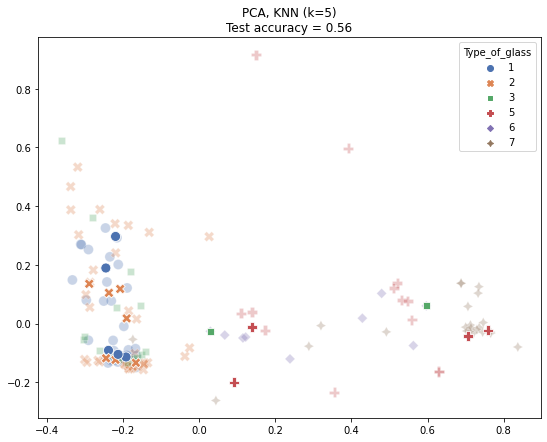

<Figure size 432x288 with 0 Axes>

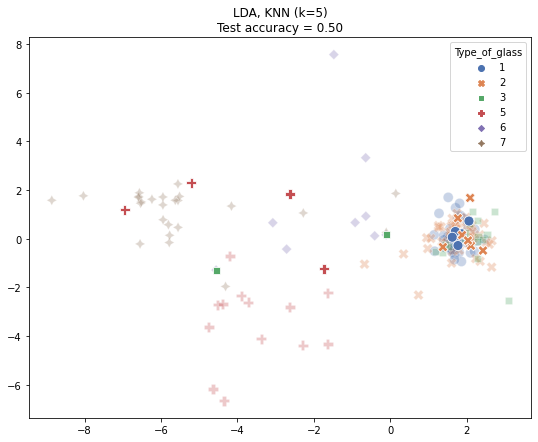

<Figure size 432x288 with 0 Axes>

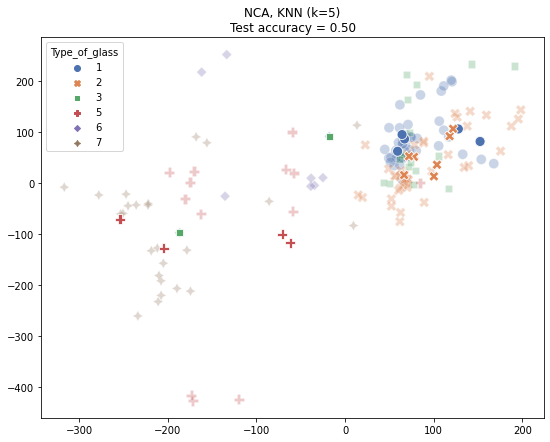

In [100]:
#@markdown 👈 &nbsp; Please, run this cell to perform PCA, LDA, and NCA. Since they use different methodologies to reduce dimension we expect to see variations in accuracy and the way the classes are clustered.

#@markdown &emsp;&emsp;For this example, we are using a cleaned and normalized data set. The training data has 90% of the data and testing data 10%.
#@markdown All data for testing is selected randomly. Every time you run this cell you should get different outcomes. The K value is set to 5.

#@markdown &emsp;&emsp;The symbols with less opacity are the training data and the solid colour ones are the testing data.

n_neighbors = 5
random_state = 0

X = dfmmn.loc[:, predictors]
y = dfmmn.loc[:, target]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(dfmmn[predictors], dfmmn[target], test_size=.1)

Xy_test = pd.concat([X_test, y_test], axis=1)
#dim = len(X[0])
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
# pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))
pca = make_pipeline(PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(
    NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state),
)

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(dfmmn[predictors])
    X_test_embedded = model.transform(X_test)

    # Plot the projected points and show the evaluation score
    fig, ax = plt.subplots(figsize=(9, 7))
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], s=100, hue='Type_of_glass', style='Type_of_glass', 
                palette="deep", data=dfmmn, alpha=0.3, ax=ax)
    sns.scatterplot(x=X_test_embedded[:, 0], y=X_test_embedded[:, 1], s=100, hue='Type_of_glass', style='Type_of_glass', 
                palette="deep", data=Xy_test, ax=ax, legend=False)
    
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )
plt.show()

### Random Trees Decision

<p align="justify">
&emsp;&emsp;A tree model traverses recursively its branches creating partitions, also called sets of records. Trees have the ability to discover hidden patterns within complex interactions.
</p>
<p align="justify">
&emsp;&emsp;In a random tree, each feature becomes a node in the tree and each node will have the target outcome for that set of records.  To measure the homogeneity or impurity there are two types of measure, *Gini impurity* and *entropy of information*  (Peter Bruce, Andrew B., Peter G., 2020).
</p>
<p align="justify">
&emsp;&emsp;See below the how to calculate the impurity of a set of records for Gini and Entropy.
</p>
<br>
Gini:

&emsp;&emsp;I(X) = p(1-p)

<br>
Entropy:

&emsp;&emsp;I(X) = -p log2(p) - (1-p) log2(1-p)


In [101]:
#@markdown 👈 &nbsp; Please, run this cell to classify the data set by using Random Tree Algorithm. 

#@markdown &emsp;&emsp;In this example, the algorithm is set to 500 estimators.

#@markdown &emsp;&emsp;Training data has 90% of the data set and the testing data 10%. The data set is normalized.

X_train, X_test, y_train, y_test = train_test_split(dfmmn[predictors], dfmmn[target], test_size=.1)

test = pd.concat([X_test, y_test], axis=1)

rf = RandomForestClassifier(n_estimators=500, random_state=1, 
                            oob_score=True, criterion='entropy')

rf.fit(X_train, y_train)

#print(rf.oob_decision_function_)

r = {
    'test': test,
    'y_test': y_test,
    'label': target,
    'y_pred': rf.predict(X_test),
    'proba': rf.predict_proba(X_test),
    'score': rf.score(X_test, y_test)
}

print('\nTrain size: {}'.format(len(X_train)))
print('Test size:  {}'.format(len(X_test)))

printModelResults(r, showtestdata=False)

print('Number of estimators:', len(rf.estimators_))




Train size: 153
Test size:  18

Classification:  Probability:                                 Actual Type:
 3                 [0.254 0.228 0.518 0.    0.    0.   ]        3
 2                 [0.064 0.892 0.038 0.004 0.002 0.   ]        1
 2                 [0.276 0.688 0.034 0.002 0.    0.   ]        1
 5                 [0.006 0.158 0.01  0.624 0.032 0.17 ]        5
 1                 [0.474 0.036 0.226 0.    0.252 0.012]        3
 7                 [0.    0.    0.    0.008 0.012 0.98 ]        7
 1                 [0.914 0.02  0.066 0.    0.    0.   ]        1
 7                 [0.    0.004 0.    0.002 0.012 0.982]        7
 2                 [0.37  0.386 0.244 0.    0.    0.   ]        3
 1                 [0.828 0.148 0.022 0.    0.    0.002]        1
 7                 [0.006 0.002 0.002 0.002 0.064 0.924]        7
 1                 [0.974 0.016 0.01  0.    0.    0.   ]        1
 1                 [0.796 0.132 0.072 0.    0.    0.   ]        1
 6                 [0.014 0.036 0.

<p align="justify">
&emsp;&emsp;Overall, the accuracy of our model is better than the KNN for this particular case. Given the accuracy is higher we got fewer wrong classifications.
</p>

#### Key Terms for Random Forest Classifier (RFC)

***n_estimators (rounds)***
<p align="justify">
&emsp;&emsp;It is important to increase the number of rounds since the algorithm learns more slowly. As long as some parameters are included to prevent overfitting, having more rounds doesn’t hurt (Peter Bruce, Andrew B., Peter G., 2020).
</p>

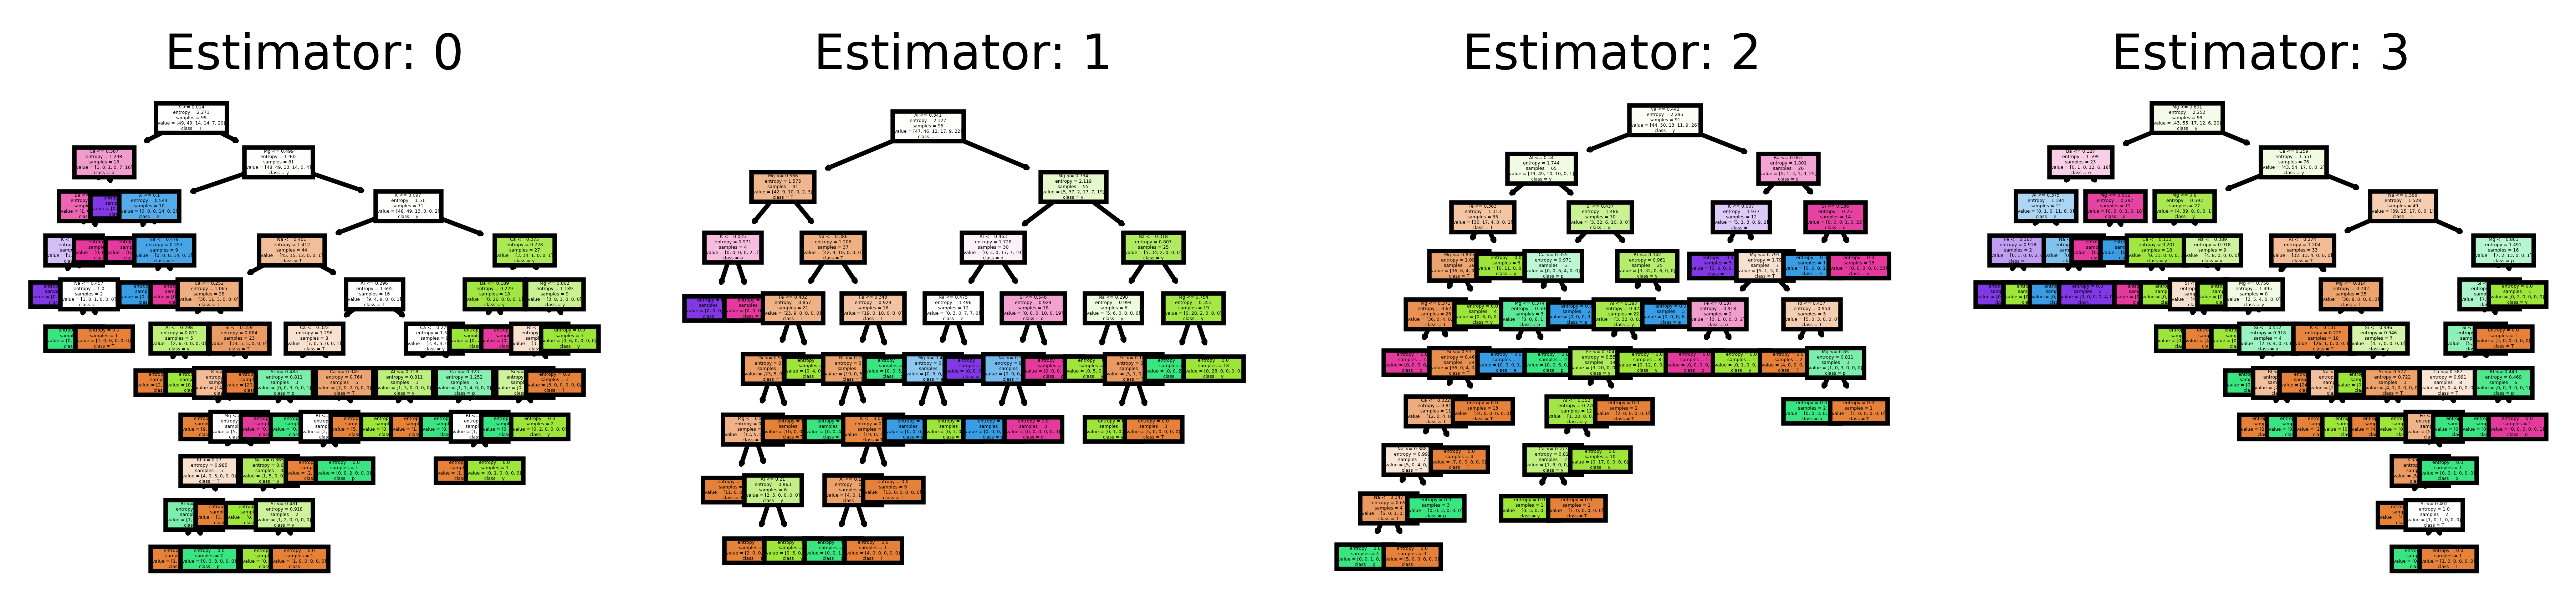

In [102]:
#@markdown 👈 &nbsp; Please, run this cell to display the three first estimators tree.
#@markdown If you want to zoom in the graphic below you can use the right button of mouse to open it in a new tab or save as image.

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10,2), dpi=900)
for index in range(0, 4):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = predictors, 
                   class_names=target,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [103]:
#@markdown 👈 &nbsp; Please, run this cell to perform a comparison between the models. 
#@markdown In this comparison we will compare, KNN, LDA, and RFC (Random Forest Classifier).
#@markdown We will not compare PCA and NCA because they do not implement the predict method.

#@markdown &emsp;&emsp;To evaluate each model we will use the k-fold cross-validation. See the result of the comparison below.

n_neighbors = 5
random_state = 0
n_estimators=500

y = dfmmn.loc[:, target]

X_train, X_test, y_train, y_test = train_test_split(dfmmn[predictors], dfmmn[target], test_size=.1)

n_classes = len(np.unique(y))

lda = make_pipeline(LinearDiscriminantAnalysis(n_components=2))

knn = KNeighborsClassifier(n_neighbors=5)

rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=1, 
                            oob_score=True)

knn = KNeighborsClassifier(n_neighbors=n_neighbors)

models = [('KNN', knn), ("LDA", lda), ("RFC", rfc)]

results = []
names = []
for i, (name, model) in enumerate(models):
    kfold = StratifiedKFold(n_splits=n_classes, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


KNN: 0.654103 (0.036444)
LDA: 0.713333 (0.106056)
RFC: 0.843077 (0.040118)


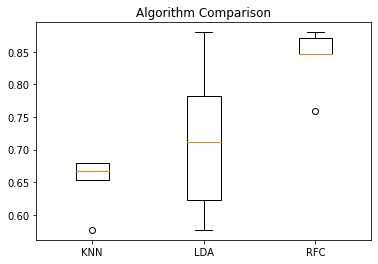

In [104]:
#@markdown 👈 &nbsp; Please, run this call to plot a boxplot comparing the models.

plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# References

In [105]:
#@markdown 👈 &nbsp; No need to run this cell unless the data set of references was updated. <font color='green'>(Optional)</font>
df_ref = pd.read_csv('https://raw.githubusercontent.com/raulFuzita/cct_ai/2022_4_8/references_ca1.csv', encoding = 'unicode_escape', engine ='python')

In [106]:
#@markdown 👈 &nbsp;No need to run this cell unless the data set of references was updated. <font color='green'>(Optional)</font>

#@markdown &emsp;&emsp;This cell contains a simple algorithm to display the references according to Harvard style. 
#@markdown The data set has the same structure required for Microsoft Word reference for Book section, Web site, and Document from a web site.

#@markdown &emsp;&emsp;For the structure of the CSV file visit <a ref="https://github.com/raulFuzita/cct_ai/tree/2022_4_8">Raul Fuzita github</a>
#@markdown and check the referece_example.csv file.

# Author: Raul Macedo Fuzita
# Github: https://github.com/raulFuzita
# Date: 17-03-2022
# Version: 1.0.0

def website(ref):
    return ('<p>' + ref['Author'] + ', ' + str(ref['Year']) + ', <i>' + ref['Title'] + '</i>. [Online]</br>Available at: <a href="' + ref['Available_At'] 
    + '">' + ref['Available_At'] + '</a></br>' 
    + '[Accessed ' + str(ref['Year_Accessed']) + ' ' + ref['Month_Accessed'] + ' ' + str(ref['Day_Accessed']) + '].</p></br>')

def bookSection(ref):
    return ('<p>' + ref['Author'] + ', ' + str(ref['Year']) + '. In: ' + ref['Editor'] + ', ed. <i>' + ref['Book_Title'] 
    + '</i>. ' + ref['City'] + ': ' + ref['Publisher'] + ', p. ' + str(ref['Pages']) + '.</p></br>')

def harvardReference(df):
    df.replace(r'^\s*$', np.nan, regex=True)
    df = df.reset_index()
    df = df.sort_values('Author')
    df.fillna(0, inplace=True)
    colsToInt = ['Year', 'Day', 'Pages', 'Year_Accessed', 'Day_Accessed']
    df[colsToInt] = df[colsToInt].astype(int)
    content = '<div style="font-size: 1.2em">'
    for index, row in df.iterrows():
        if row['Type_of_Source'] == 'Book section':
            content += bookSection(row)
        elif row['Type_of_Source'] == 'Web site':
            content += website(row)
        elif row['Type_of_Source'] == 'Document from web site':
            content += website(row)
        else:
            content += ''
    content += '</div>'
    chart = HTML(content)
    display(chart)

In [107]:
#@markdown 👈 &nbsp; No need to run this cell unless the data set of references was updated. If there is an update do not forget to run the cell to import the data set and the algorithm to print the references in Harvard style. <font color='green'>(Optional)</font>

#@markdown &emsp;&emsp;Please, scroll up or down to see all the references. 

harvardReference(df_ref)